<a href="https://colab.research.google.com/github/Datamathican/Predict-Bike-Sharing-Demand-with-AutoGluon/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.2 MB/s  0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.4 MB/s  0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'bokeh' when getting requirements to build wheel
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of openxlab t

### Setup Kaggle API Key

In [5]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pramodsingh77 "
kaggle_key = "25db5c8829e97464c089a1a11617ab7d"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [8]:
# Install Kaggle library
!pip install -q kaggle

# Upload kaggle.json
from google.colab import files
uploaded = files.upload()

# Set up Kaggle directory and permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Bike Sharing Demand dataset and unzip it
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip

Saving sampleSubmission.csv to sampleSubmission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
cp: cannot stat 'kaggle.json': No such file or directory
401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download-all/bike-sharing-demand
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [25]:
# 1. Upload your kaggle.json file
from google.colab import files
print("Please upload your kaggle.json file:")
files.upload()

# 2. Move it to the hidden folder Kaggle expects
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Submit the file you already generated!
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
100% 188k/188k [00:01<00:00, 158kB/s]
Successfully submitted to Bike Sharing Demand

In [9]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [12]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('train.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20260226_201417"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Feb  2 12:27:57 UTC 2026
CPU Count:          2
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       5.57 GB / 12.67 GB (44.0%)
Disk Space Avail:   78.88 GB / 107.72 GB (73.2%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stac

(_ray_fit pid=13302) [1000]	valid_set's rmse: 5.59925
(_ray_fit pid=13302) [3000]	valid_set's rmse: 4.89408 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_ray_fit pid=13303) 	Ran out of time, early stopping on iteration 5870. Best iteration is:
(_ray_fit pid=13303) 	[5814]	valid_set's rmse: 4.65273


(_ray_fit pid=13302) [6000]	valid_set's rmse: 4.70966 [repeated 6x across cluster]
(_ray_fit pid=13545) [1000]	valid_set's rmse: 5.73848
(_ray_fit pid=13550) [1000]	valid_set's rmse: 4.69305
(_ray_fit pid=13545) [4000]	valid_set's rmse: 4.95624 [repeated 5x across cluster]
(_ray_fit pid=13545) [6000]	valid_set's rmse: 4.86556 [repeated 4x across cluster]


(_ray_fit pid=13545) 	Ran out of time, early stopping on iteration 6217. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=13545) 	[6211]	valid_set's rmse: 4.85831 [repeated 2x across cluster]


(_ray_fit pid=13780) [1000]	valid_set's rmse: 5.40893 [repeated 2x across cluster]
(_ray_fit pid=13780) [4000]	valid_set's rmse: 4.61361 [repeated 6x across cluster]
(_ray_fit pid=13780) [6000]	valid_set's rmse: 4.51883 [repeated 4x across cluster]


(_ray_fit pid=13780) 	Ran out of time, early stopping on iteration 6266. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=13780) 	[6261]	valid_set's rmse: 4.50907 [repeated 2x across cluster]


(_ray_fit pid=14006) [1000]	valid_set's rmse: 5.32442
(_ray_fit pid=14007) [1000]	valid_set's rmse: 6.1798
(_ray_fit pid=14006) [4000]	valid_set's rmse: 4.34373 [repeated 5x across cluster]
(_ray_fit pid=14006) [6000]	valid_set's rmse: 4.22387 [repeated 4x across cluster]


(_ray_fit pid=14007) 	Ran out of time, early stopping on iteration 6014. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=14007) 	[6004]	valid_set's rmse: 5.38541 [repeated 2x across cluster]
(_dystack pid=13071) 	-4.5922	 = Validation score   (-root_mean_squared_error)
(_dystack pid=13071) 	124.98s	 = Training   runtime
(_dystack pid=13071) 	27.63s	 = Validation runtime
(_dystack pid=13071) Fitting model: WeightedEnsemble_L2 ... Training model for up to 123.79s of the -17.29s of remaining time.
(_dystack pid=13071) 	Fitting 1 model on all data | Fitting with cpus=2, gpus=0, mem=0.0/9.3 GB
(_dystack pid=13071) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 1.0}
(_dystack pid=13071) 	-4.5922	 = Validation score   (-root_mean_squared_error)
(_dystack pid=13071) 	0.01s	 = Training   runtime
(_dystack pid=13071) 	0.0s	 = Validation runtime
(_ray_fit pid=14006) 	Ran out of time, early stopping on iteration 6169. Best iteration is:
(_ray_fit pid=14006) 	[6159]	valid_set's rmse: 4.2173

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -2.868572  root_mean_squared_error      95.771055  425.524411                0.000838           0.023715            3       True          5
1  WeightedEnsemble_L2  -2.898864  root_mean_squared_error      60.111070  247.110201                0.000815           0.017228            2       True          3
2      LightGBM_BAG_L1  -3.124826  root_mean_squared_error       5.084421   64.513862                5.084421          64.513862            1       True          2
3    LightGBMXT_BAG_L1  -4.209634  root_mean_squared_error      55.025834  182.579111               55.025834         182.579111            1       True          1
4    LightGBMXT_BAG_L2  -4.241277  root_mean_squared_error      95.770217  425.500696               35.659962         

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-4.209633576322336),
  'LightGBM_BAG_L1': np.float64(-3.124825813111386),
  'WeightedEnsemble_L2': np.float64(-2.8988640378471153),
  'LightGBMXT_BAG_L2': np.float64(-4.241276773301336),
  'WeightedEnsemble_L3': np.float64(-2.8685722669874636)},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMXT_BAG_L2': ['LightGBMXT_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMXT_BAG_L1': 182.57911086082458,
  'LightGBM_BAG_L1': 64.51386189460754,
  'WeightedEnsemble_L2': 0.017228126525878

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

,count
0,15.974344
1,40.484604
2,31.942654
3,12.976604
4,0.945772


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,10886.000000
mean,191.570602
std,181.126328
min,0.830304
25%,42.472381
50%,145.023087
75%,283.754028
max,961.188660


In [19]:
# How many negative values do we have?
predictions[predictions<0]

,count


In [20]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/submission-url


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2026-02-26 20:45:27.877000  first raw submission  SubmissionStatus.COMPLETE  1.97611      1.97611       


#### Initial score of `1.97611`


## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

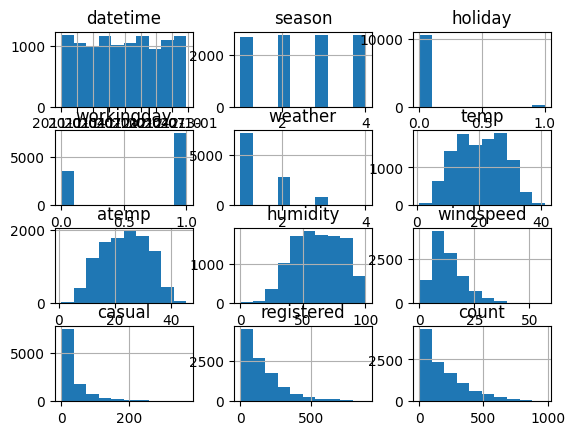

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [28]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [29]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [30]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

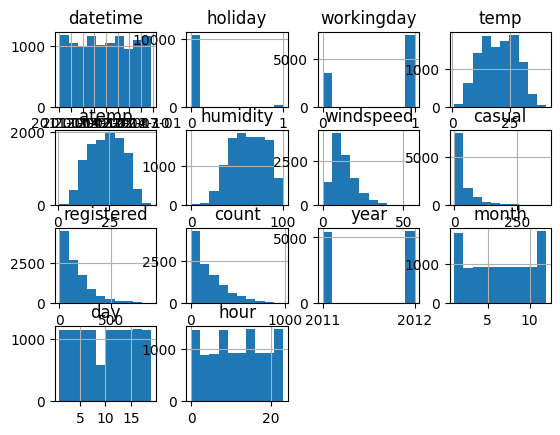

In [31]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [32]:
predictor_new_features = TabularPredictor(label="count",problem_type = "regression", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns":
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20260226_204807"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Feb  2 12:27:57 UTC 2026
CPU Count:          2
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       9.85 GB / 12.67 GB (77.8%)
Disk Space Avail:   78.45 GB / 107.72 GB (72.8%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stac

In [33]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -32.207124  root_mean_squared_error      46.003402  314.235710                0.001245           0.065820            3       True          8
1     WeightedEnsemble_L2 -32.428009  root_mean_squared_error      44.963722  229.070295                0.001118           0.037441            2       True          4
2         LightGBM_BAG_L2 -32.867880  root_mean_squared_error      45.125119  265.224999                0.162515          36.192144            2       True          6
3  RandomForestMSE_BAG_L2 -33.041864  root_mean_squared_error      45.839643  277.977746                0.877038          48.944891            2       True          7
4       LightGBMXT_BAG_L2 -33.747538  root_mean_squared_error      45.465337  271.824717               

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-34.453884062670745),
  'LightGBM_BAG_L1': np.float64(-33.91733862651761),
  'RandomForestMSE_BAG_L1': np.float64(-38.424983594881716),
  'WeightedEnsemble_L2': np.float64(-32.42800924754536),
  'LightGBMXT_BAG_L2': np.float64(-33.74753844537606),
  'LightGBM_BAG_L2': np.float64(-32.8678800889691),
  'RandomForestMSE_BAG_L2': np.float64(-33.041863923154075),
  'WeightedEnsemble_L3': np.float64(-32.20712426089431)},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
 

In [34]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)
new_predictions[new_predictions<0] = 0

In [35]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 153kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2026-02-26 21:05:05.307000  new features          SubmissionStatus.COMPLETE  1.94611      1.94611       
submission.csv               2026-02-26 20:45:27.877000  first raw submission  SubmissionStatus.COMPLETE  1.97611      1.97611       


#### New Score of `1.94611 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [43]:
import autogluon.common as ag
from autogluon.tabular import TabularPredictor

# Define hyperparameter dictionaries
nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': 'relu',
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
}

# Fit the model with hyperparameters
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs='auto'
)

# Predict and handle negatives
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

No path specified. Models will be saved in: "AutogluonModels/ag-20260226_210946"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Feb  2 12:27:57 UTC 2026
CPU Count:          2
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       9.75 GB / 12.67 GB (76.9%)
Disk Space Avail:   77.75 GB / 107.72 GB (72.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

In [44]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -3.117569  root_mean_squared_error       0.942701  160.019619                0.001021           0.026872            3       True          9
1   LightGBM_BAG_L2/T2  -3.296712  root_mean_squared_error       0.941680  159.992747                0.203902          41.447618            2       True          6
2  WeightedEnsemble_L2  -3.391539  root_mean_squared_error       0.495352   76.291635                0.001522           0.041144            2       True          4
3   LightGBM_BAG_L1/T2  -3.609843  root_mean_squared_error       0.307677   37.607070                0.307677          37.607070            1       True          2
4   LightGBM_BAG_L2/T1  -3.832553  root_mean_squared_error       0.898465  156.797185                0.160687         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-3.892753736846433),
  'LightGBM_BAG_L1/T2': np.float64(-3.609843232974275),
  'LightGBM_BAG_L1/T3': np.float64(-5.468331801709991),
  'WeightedEnsemble_L2': np.float64(-3.391538901910847),
  'LightGBM_BAG_L2/T1': np.float64(-3.8325527879221455),
  'LightGBM_BAG_L2/T2': np.float64(-3.2967115068559103),
  'LightGBM_BAG_L2/T3': np.float64(-4.426642398373298),
  'LightGBM_BAG_L2/T4': np.float64(-97.82172242711178),
  'WeightedEnsemble_L3': np.float64(-3.117568744

In [45]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0

In [46]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [47]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 157kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2026-02-26 21:17:53.097000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.94707      1.94707       
submission_new_features.csv  2026-02-26 21:05:05.307000  new features                       SubmissionStatus.COMPLETE  1.94611      1.94611       
submission.csv               2026-02-26 20:45:27.877000  first raw submission               SubmissionStatus.COMPLETE  1.97611      1.97611       


#### New Score of ` 1.94707  `

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

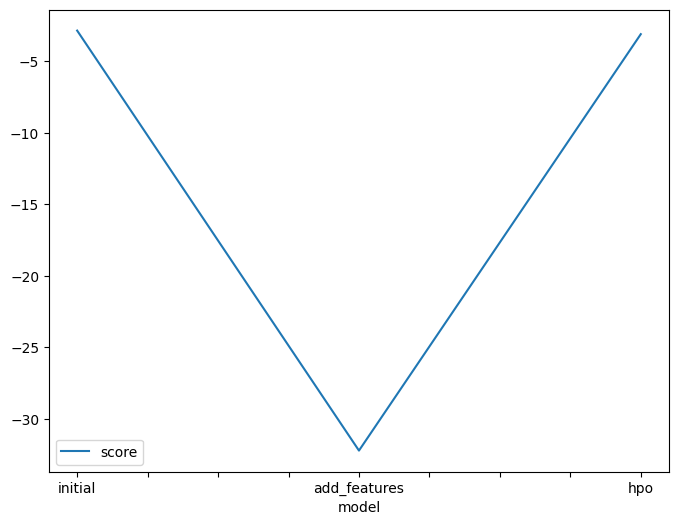

In [50]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-2.868572, -32.207124 , -3.117569]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

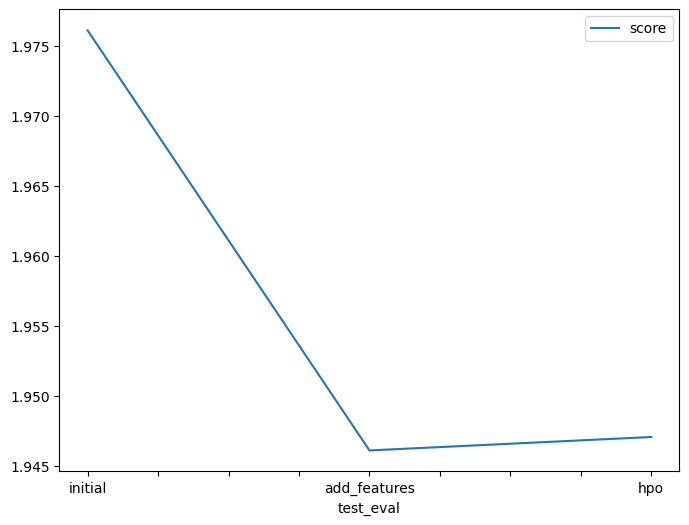

In [57]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.97611, 1.94611, 1.94707 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality'"],
    "hp-method": ["none", "problem_type = 'regression'", "tabular autogluon"],
    "score": [1.97611, 1.94611, 1.94707 ]
})

,model,timelimit,presets,hp-method,score
0,initial,time_limit = 600,presets='best_quality',none,1.97611
1,add_features,time_limit=600,presets='best_quality',problem_type = 'regression',1.94611
2,hpo,time_limit=600,presets='best_quality',tabular autogluon,1.94707
